

1.   Creating the clusters


> If you want to see what does each cell do, you can uncomment  "print" lines to see how the data is formed, is way easier to see what is happening if you reduce the observations to 10 for example




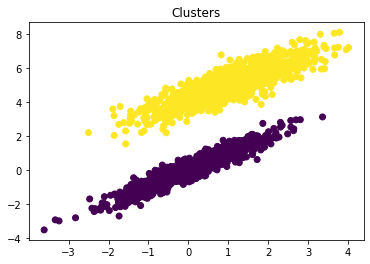

[-0.38336208 -2.36033487 -0.35844329 ...  1.55024755  0.05916472
  0.83748877]
[-0.48799241 -2.44005346  0.14198118 ...  4.89820576  4.65455151
  5.21159935]


In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.close_figures=False # keep figures open in pyplot

np.random.seed(5)

# number of observations
obs = 1000


class_zeros = np.random.multivariate_normal([0,0], [[1.,.95],[.95,1.]], obs)
#print(class_zeros)

class_ones = np.random.multivariate_normal([1,5], [[1.,.85],[.85,1.]], obs)
#print(class_ones)

inter = np.ones ((2*obs,1))

#Here you concatenate the two classes 
feat = np.vstack((class_zeros,class_ones)).astype(np.float32)
feat = np.hstack((inter,feat))


#print(feat)

label_zeros = np.zeros((obs,1))
label_ones = np.ones((obs,1))


et = np.vstack((label_zeros,label_ones))
ds = np.hstack((feat,et))
#print(et)
#print(ds)
x = feat[:,1]
t1 = x
y = feat[:,2] 
t2 = y   
yi = feat[:,0]
et = ds[:,3]
at= et
fig =plt.figure(1)
ax = plt.scatter(x, y, c = et)
plt.title('Clusters') 
plt.show()
print(feat[:,1])
print(y)


2.   Create a random data, and training and test sets



In [22]:

# shuffling the data to make the sampling random
np.random.shuffle(ds)

    # splitting the data into train/test sets
train = ds[0:int(0.7*(obs*2))]
test = ds[int(0.7*(obs*2)):(obs*2)]

#print(train)
x_train = train[:,0:3]
y_train = train[:,3]
#print(x_train)
#print(y_train)
x_test = test[:,0:3]
y_test = test[:,3]



3.   Creating the Perceptron function


> In this part we are going to define the threshold,that is part of the sign function, the learning rate applied in gradient descent and the number of training set for out data



> Inside the while you can see the dot product between the weights and the features, after the decision function and the learning part






In [23]:



#core of the perceptron model 
z = 0.0     # threshold
eta = 0.1   # learning rate
t = 5     # number of iterations


def Perceptron (x, y , z , eta, t):
    # weight given by the number of features
    w = np.zeros(len(x[0]))
    n = 0

    yhate = np.ones(len(y))
    error = np.ones(len(y))
    k = []

    while n < t:
        for i in range(0,len(x)):
            # dot product
            f  = np.dot(x[i],w)
            # activation of the function 

            if f >= z: 
                yhat = 1.

            else:
                yhat = 0.

            yhate[i] = yhat

            #updating each weight 

            for j in range (0,len(w)):
                w[j] = w[j] + eta*(y[i]-yhat)*x[i][j]

        n += 1

        for i in range(0,len(y)):
            error[i] = (y[i] - yhate[i])**2
        k.append(0.5*np.sum(error))

    return w,k,n



4. Applying the function to our training sets 

In [24]:

Perceptron(x_train,y_train,z,eta,t)

w = Perceptron(x_train, y_train, z, eta, t)[0]

k = Perceptron(x_train, y_train, z, eta, t)[1]

epoch = np.linspace(1,len(k),len(k))
print(w)
print('Iteration',epoch)
print('Error',k)


[-0.7        -0.43283606  0.42203522]
Iteration [1. 2. 3. 4. 5.]
Error [5.5, 0.0, 0.0, 0.0, 0.0]


5.- Decision Boundary plotting 

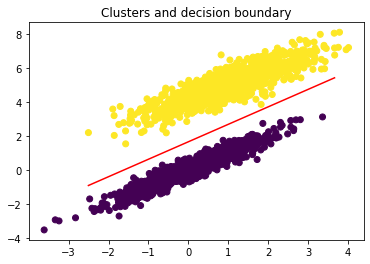

In [29]:
 # plot the decision boundary
    # 0 = w0x0 + w1x1 + w2x2
    # x2 = (-w0x0-w1x1)/w2

min = np.min(x_test[:,1])
max = np.max(x_test[:,1])
x1 = np.linspace(min,max,100)

def x2(x1, w):
    w0 = w[0]
    w1 = w[1]
    w2 = w[2]
    x2 = []
    for i in range(0, len(x1-1)):
        x2_temp = (-w0-w1*x1[i])/w2
        x2.append(x2_temp)
    return x2
x_2 = x2(x1,w)
plt.plot(x1, x_2, c = "red")
plt.title('Clusters and decision boundary')
plt.show()

Text(0.5, 1.0, 'Perceptron Convergence')

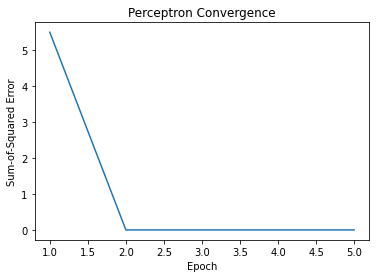

In [ ]:
plt.figure(2)
plt.plot(epoch, k)
plt.xlabel('Epoch')
plt.ylabel('Sum-of-Squared Error')
plt.title('Perceptron Convergence')